# Musical Narrative Generation Examples

This notebook demonstrates the algorithmic composition of musical pieces aligned with different narrative structures. It showcases the process of:

1. Defining narrative arcs and computing their tension curves.
2. Loading character motifs.
3. Using a genetic algorithm to compose music that reflects the narrative tension and incorporates character motifs.
4. Playing the generated musical examples.

The examples cover several narrative archetypes: Simple Narrative, Donor Narrative, Conflict Narrative, and Quest Narrative.

## Setup

Import necessary libraries and modules. This includes the core `musical_narrative` components, example narrative structures from `narrative_example`, and functions for playing music using MuseScore from `genetic_algorithm`.

In [1]:
import pickle
from musical_narrative import *
from narrative_example import *
from genetic_algorithm import play_individual_musescore, play_individuals_musescore

# Simple Narrative Test

This section demonstrates a basic narrative structure. We create a simple narrative, compute its tension curve, and then generate music for it.

The description of the simple narrative is the following:

1. Villain commits crime against victim
2. Hero pursues villain
3. Hero defeats villain

For the full structure please refer to `narrative_explample.py`.

In [21]:
span = create_example_narrative_simple()
span_tension = span.compute_tension_curve()

Normalizing tension curve, check for problems


Plot the tension curve of the simple narrative.

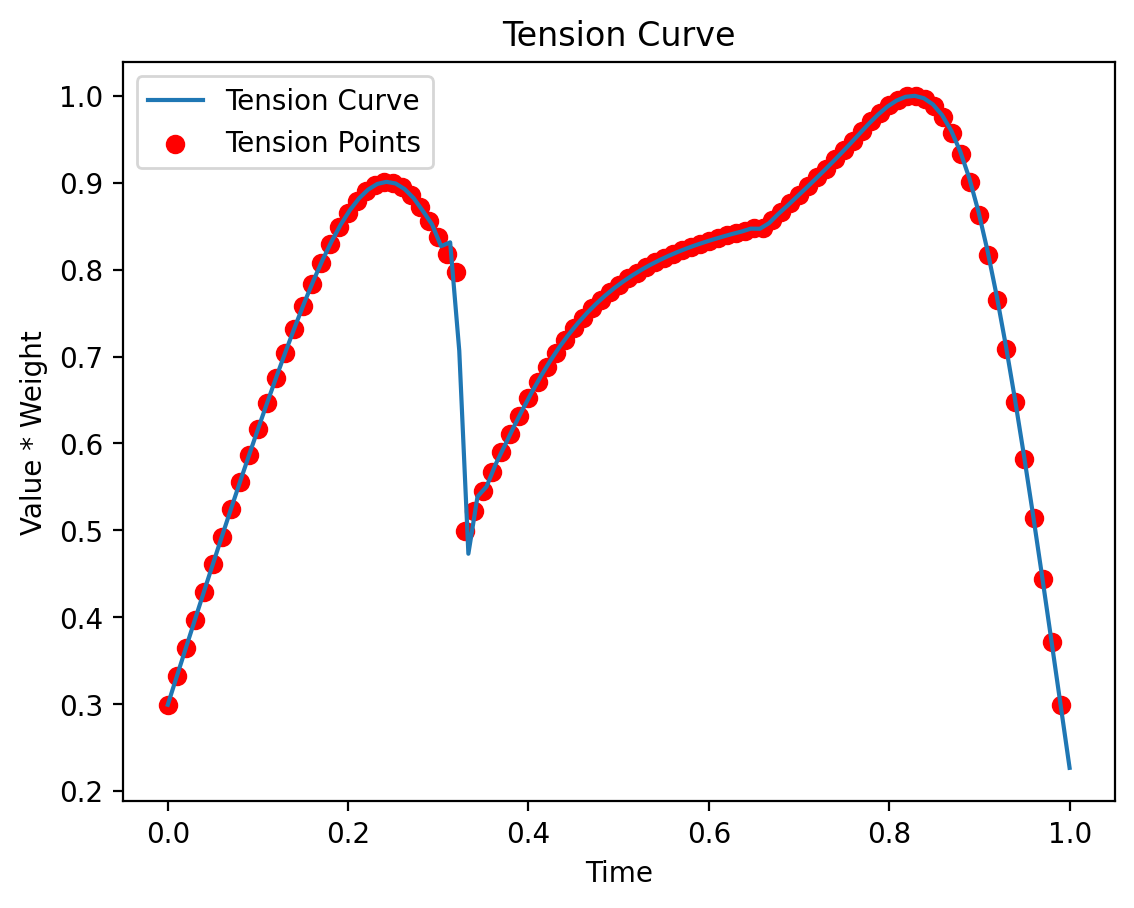

In [22]:
span_tension.plot()

Load pre-defined musical motifs for the characters (Hero, Villain, Victim). These motifs will be used by the genetic algorithm to represent characters in the generated music.

In [58]:
motif_hero = pickle.load(open("test_notebooks/motif_hero.pkl", "rb"))
motif_villain = pickle.load(open("test_notebooks/motif_villain.pkl", "rb"))
motif_victim = pickle.load(open("test_notebooks/motif_victim.pkl", "rb"))

def get_characters_motif(character):
    if character.name == "Hero":
        return motif_hero
    elif character.name == "Villain":
        return motif_villain
    elif character.name == "Victim":
        return motif_victim
    else:
        print("Unknown character")
        return None

Since we loaded the motifs for each character, we have to assign them to each plot atom in the narrative span. This involves identifying unique characters and associating their motifs with each segment of the story.

In [59]:
characters_motif = {}
unique_characters = set()
motifs_per_atom = []
protagonist_indeces = []

for atom in span.plot_atoms:
    current_atom = []
    protagonist_indeces.append(-1)
    for i, role in enumerate(atom.roles):
        character = role[1]
        unique_characters.add(character)
        if characters_motif.get(character) is None:
            motif = get_characters_motif(character)
            characters_motif[character] = motif
        else:
            motif = characters_motif[character]
        if character == span.protagonist:
            protagonist_indeces[-1] = i
        current_atom.append(motif)
    motifs_per_atom.append(current_atom)


Define parameters for the algorithmic music composition process, such as population size for the genetic algorithm, number of bars per plot atom, motif length, and total number of atoms.

In [23]:
pop_size = 200
bars_per_atom = 8
motif_length = 2
n_atoms = len(span.plot_atoms)
total_bars = bars_per_atom*n_atoms

Initialize the `PlotSpanMusicGenerator` with the narrative span and character motifs.

In [41]:
span_composer = PlotSpanMusicGenerator(span, characters_motifs=characters_motif)

Run the genetic algorithm to compose music for the plot span. This will generate a set of potential musical solutions.

In [42]:
solutions = span_composer.compose_plot_span_music(200)

Using existing motif for Victim
Using existing motif for Villain
Composing music for villainy
Generation 1/200
Generation 2/200
Generation 3/200
Generation 4/200
Generation 5/200
Generation 6/200
Generation 7/200
Generation 8/200
Generation 9/200
Generation 10/200
Generation 11/200
Generation 12/200
Generation 13/200
Generation 14/200
Generation 15/200
Generation 16/200
Generation 17/200
Generation 18/200
Generation 19/200
Generation 20/200
Generation 21/200
Generation 22/200
Generation 23/200
Generation 24/200
Generation 25/200
Generation 26/200
Generation 27/200
Generation 28/200
Generation 29/200
Generation 30/200
Generation 31/200
Generation 32/200
Generation 33/200
Generation 34/200
Generation 35/200
Generation 36/200
Generation 37/200
Generation 38/200
Generation 39/200
Generation 40/200
Generation 41/200
Generation 42/200
Generation 43/200
Generation 44/200
Generation 45/200
Generation 46/200
Generation 47/200
Generation 48/200
Generation 49/200
Generation 50/200
Generation 51/2

Play one of the generated musical solutions. Here, we choose the 13th solution (index 12).

In [63]:
play_individuals_musescore(solutions[12][0])

# Donor Narrative

This section explores a 'Donor' narrative arc, characterized by a specific tension pattern. We create the narrative, plot its tension, load pre-computed musical elements, and generate new music.

The description of the donor narrative is the following:

1. Wizard tests hero
2. Wizard prepares hero for task with a gift
3. Hero uses gift to defeat dragon

For the full structure please refer to `narrative_explample.py`.

In [99]:
donor_span = create_arc_tension_narrative()

Plot the tension curve for the Donor narrative.

Normalizing tension curve, check for problems


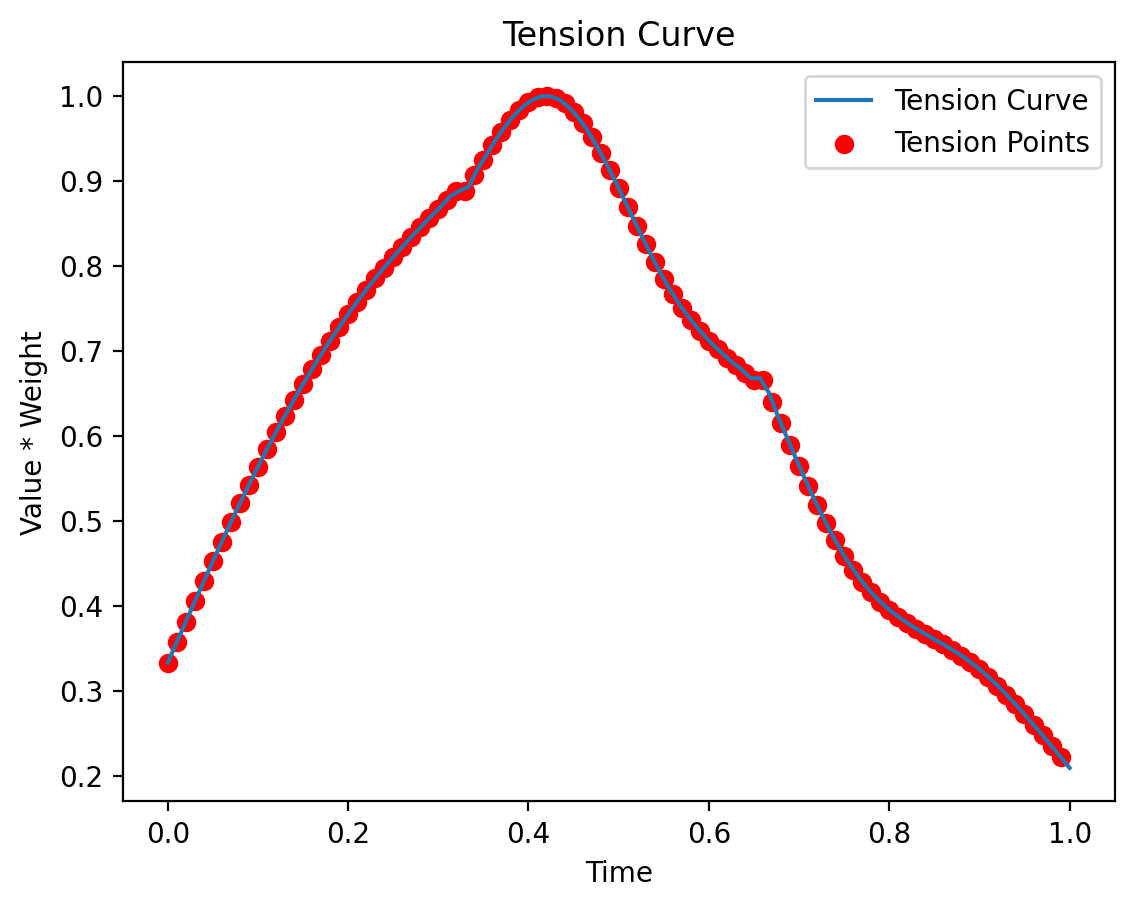

In [100]:
donor_span.compute_tension_curve().plot()

Load a pre-computed `PlotSpanMusicGenerator` object for the Donor narrative. This object likely contains character motifs and other settings that were previously determined or saved.

In [ ]:
donor_span_composer = pickle.load(open("saved_data/donor_arc_span_composer_200.pkl", "rb"))
characters_motifs_donor = donor_span_composer.character_motifs

Define parameters for music generation and re-initialize the `PlotSpanMusicGenerator` for the Donor narrative, using the loaded character motifs.

In [5]:
pop_size = 200
bars_per_atom = 8
motif_length = 2
n_atoms = len(donor_span.plot_atoms)
total_bars = bars_per_atom*n_atoms
donor_span_composer = PlotSpanMusicGenerator(donor_span, characters_motifs=characters_motifs_donor)

Compose music for the Donor narrative span.

In [ ]:
donor_solutions = donor_span_composer.compose_plot_span_music(200)

Normalizing tension curve, check for problems


Play one of the generated musical solutions for the Donor narrative (second solution, index 1).

In [109]:
play_individuals_musescore(donor_solutions[1][0])

Save a chosen musical solution for the Donor narrative to a file.

In [ ]:
pickle.dump(donor_solutions[1][0], open("saved_data/donor_solution_chosen.pkl", "wb"))

# Conflict Narrative

This section focuses on a 'Conflict' or rising tension narrative. Similar to previous sections, it involves creating the narrative, plotting tension, loading relevant data, and generating music.

The description of the conflict narrative is the following:

1. Villain kidnaps princess
2. Hero pursues and defeats villain
3. Hero rescues princess

For the full structure please refer to `narrative_explample.py`.

In [2]:
conflict_span = create_rising_tension_narrative()

Plot the tension curve for the Conflict narrative.

Normalizing tension curve, check for problems


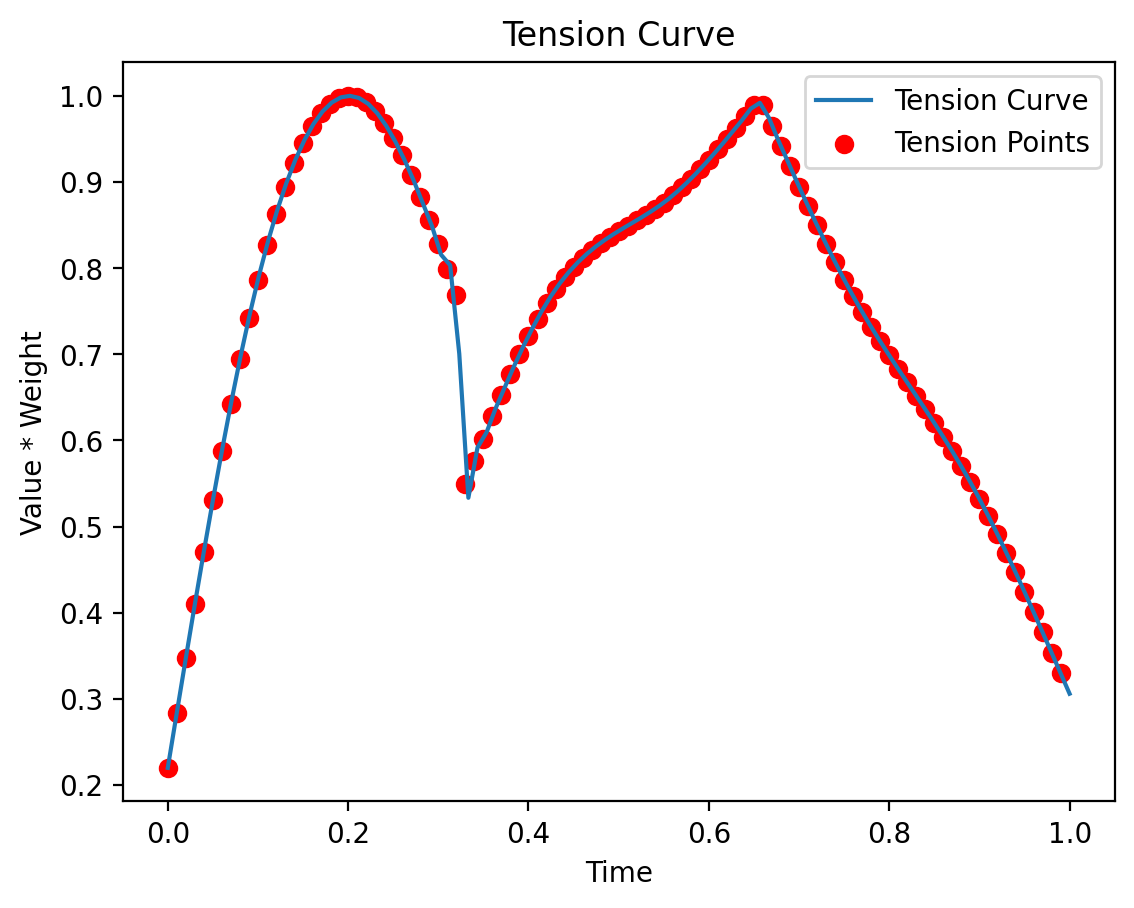

In [3]:
conflict_span.compute_tension_curve().plot()

Load a pre-computed `PlotSpanMusicGenerator` and character motifs for the Conflict narrative.

In [ ]:
conflict_span_composer = pickle.load(open("saved_data/conflict_span_rising_composer_200.pkl", "rb"))
characters_motif_conflict = conflict_span_composer.character_motifs

In [ ]:
conflict_characters_motifs = pickle.load(open("saved_data/conflict_characters_motifs.pkl", "rb"))

Define parameters and initialize the `PlotSpanMusicGenerator` for the Conflict narrative.

In [7]:
pop_size = 200
bars_per_atom = 8
motif_length = 2
n_atoms = len(conflict_span.plot_atoms)
total_bars = bars_per_atom*n_atoms
conflict_span_composer = PlotSpanMusicGenerator(conflict_span, characters_motifs=conflict_characters_motifs)

Compose music for the Conflict narrative span.

In [10]:
solutions_conflict = conflict_span_composer.compose_plot_span_music(200)

Using existing motif for Princess
Using existing motif for Villain
Composing music for villainy
Generation 1/200
Generation 2/200
Generation 3/200
Generation 4/200
Generation 5/200
Generation 6/200
Generation 7/200
Generation 8/200
Generation 9/200
Generation 10/200
Generation 11/200
Generation 12/200
Generation 13/200
Generation 14/200
Generation 15/200
Generation 16/200
Generation 17/200
Generation 18/200
Generation 19/200
Generation 20/200
Generation 21/200
Generation 22/200
Generation 23/200
Generation 24/200
Generation 25/200
Generation 26/200
Generation 27/200
Generation 28/200
Generation 29/200
Generation 30/200
Generation 31/200
Generation 32/200
Generation 33/200
Generation 34/200
Generation 35/200
Generation 36/200
Generation 37/200
Generation 38/200
Generation 39/200
Generation 40/200
Generation 41/200
Generation 42/200
Generation 43/200
Generation 44/200
Generation 45/200
Generation 46/200
Generation 47/200
Generation 48/200
Generation 49/200
Generation 50/200
Generation 51

Play the first generated musical solution for the Conflict narrative.

In [20]:
play_individuals_musescore(solutions_conflict[0][0])

beam: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 6 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, <music21.beam.Beams <music21.beam.Beam 1/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
beam: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 6 of 
[<music21.beam.Beams <music21.beam.Beam 1/sta

# Quest Narrative

This section deals with a 'Quest' or oscillating tension narrative. The process includes creating the narrative, plotting its tension, printing its description, loading pre-computed data, generating music, and saving results.

The description of the quest narrative is the following:

1. King assigns difficult task to hero
2. Mysterious wise woman helps hero
3. Hero completes task and receives recognition from king

For the full structure please refer to `narrative_explample.py`.

In [2]:
task_span = create_oscillating_tension_narrative()

Plot the tension curve for the Quest narrative.

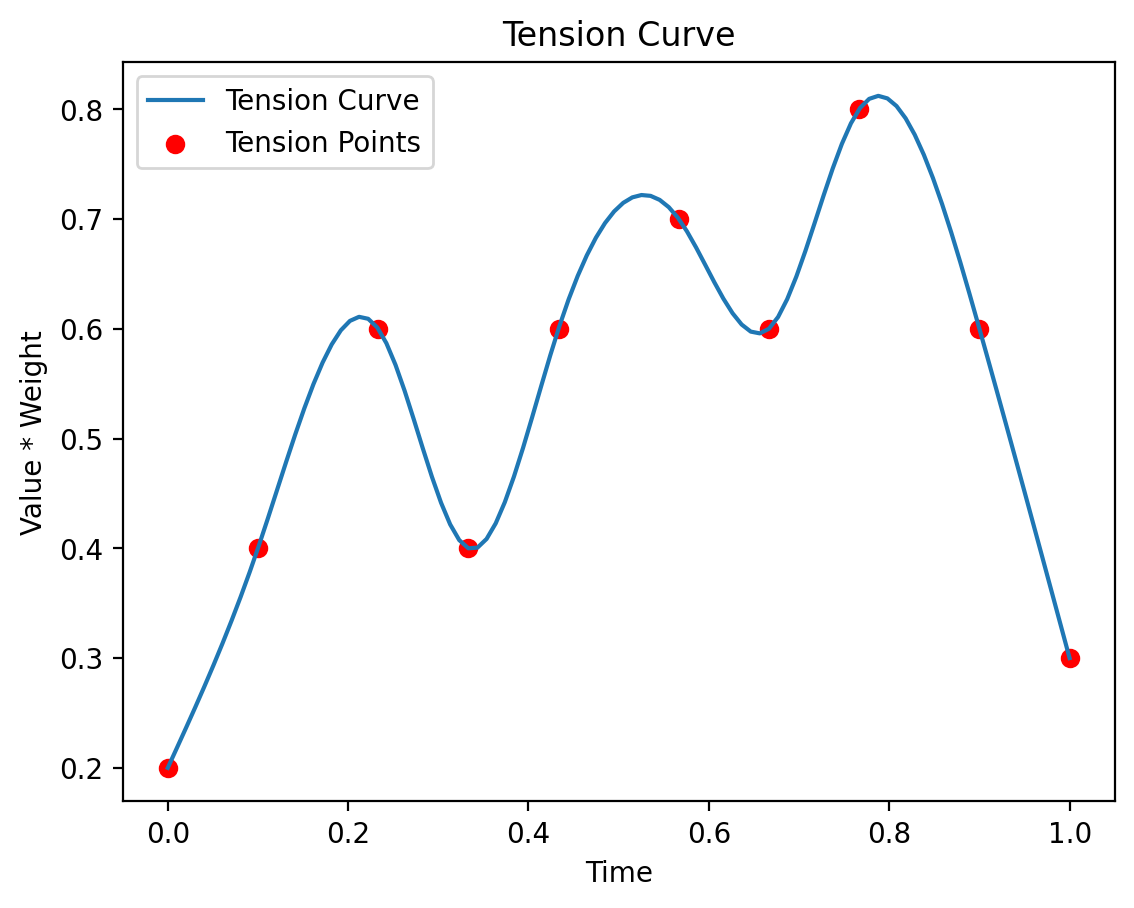

In [3]:
task_span.compute_tension_curve().plot()

Load a pre-computed `PlotSpanMusicGenerator` and character motifs for the Quest narrative.

In [ ]:
task_span_composer = pickle.load(open("saved_data/task_span_composer_200.pkl", "rb"))
characters_motif_task = task_span_composer.character_motifs

Define parameters and initialize the `PlotSpanMusicGenerator` for the Quest narrative.

In [6]:
pop_size = 200
bars_per_atom = 8
motif_length = 2
n_atoms = len(task_span.plot_atoms)
total_bars = bars_per_atom*n_atoms
task_span_composer = PlotSpanMusicGenerator(task_span, characters_motifs=characters_motif_task)

Compose music for the Quest narrative span.

In [7]:
solutions_task = task_span_composer.compose_plot_span_music(200)

Using existing motif for Hero
Using existing motif for King
Composing music for task
Generation 1/200
Generation 2/200
Generation 3/200
Generation 4/200
Generation 5/200
Generation 6/200
Generation 7/200
Generation 8/200
Generation 9/200
Generation 10/200
Generation 11/200
Generation 12/200
Generation 13/200
Generation 14/200
Generation 15/200
Generation 16/200
Generation 17/200
Generation 18/200
Generation 19/200
Generation 20/200
Generation 21/200
Generation 22/200
Generation 23/200
Generation 24/200
Generation 25/200
Generation 26/200
Generation 27/200
Generation 28/200
Generation 29/200
Generation 30/200
Generation 31/200
Generation 32/200
Generation 33/200
Generation 34/200
Generation 35/200
Generation 36/200
Generation 37/200
Generation 38/200
Generation 39/200
Generation 40/200
Generation 41/200
Generation 42/200
Generation 43/200
Generation 44/200
Generation 45/200
Generation 46/200
Generation 47/200
Generation 48/200
Generation 49/200
Generation 50/200
Generation 51/200
Genera

Save the `PlotSpanMusicGenerator` object for the Quest narrative, which now includes the generated solutions.

In [ ]:
pickle.dump(task_span_composer, open("saved_data/task_span_composer_200.pkl", "wb"))

Play one of the generated musical solutions for the Quest narrative (40th solution, index 39).

In [17]:
play_individuals_musescore(solutions_task[39][0])

Generate alternative solutions by joining Pareto front solutions with a weighted sum. This is a way to combine different optimal solutions based on multiple objectives.

In [17]:
alternative_solutions = task_span_composer.join_pareto_solutions_weighted_sum([0.1, 0.8, 0.1])

Play the first alternative solution.

In [18]:
play_individuals_musescore(alternative_solutions[0][0])